In [ ]:
# first, we will need import our libraries

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# now defining the VGGFace Model (as defined by Oxford Researchers)

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape = (224, 224, 3)))
model.add(Convolution2D(64, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation= 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2)))
# stop at here, then get csv file

model.add(Convolution2D(4096, (7, 7), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras.models import model_from_json


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# data_dir is the folder where each subfolder contains the original images and processed results
# must change the following path
data_dir = '/content/gdrive/My Drive/vgg_face_weights.h5'

In [ ]:
model.load_weights(data_dir)

In [ ]:
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  return img

In [ ]:
vgg_face_descriptor1 = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output)

In [ ]:
vgg_face_descriptor2 = Model(inputs = model.layers[0].input, outputs = model.layers[-6].output)

In [ ]:
vgg_face_descriptor3 = Model(inputs = model.layers[0].input, outputs = model.layers[-13].output)

In [ ]:
vgg_face_descriptor4 = Model(inputs = model.layers[0].input, outputs = model.layers[-20].output)

In [ ]:
vgg_face_descriptor5 = Model(inputs = model.layers[0].input, outputs = model.layers[-27].output)

In [ ]:
vgg_face_descriptor6 = Model(inputs = model.layers[0].input, outputs = model.layers[-32].output)

In [ ]:
import os

# Get the list of all files and directories
path = "/content/gdrive/My Drive/preprocessed_faces/"
dir_list = os.listdir(path)
dir_list


['F007C.png',
 'F006C.png',
 'F010C.png',
 'F009C.png',
 'F008C.png',
 'F014C.png',
 'F025C.png',
 'F032C.png',
 'F030C.png',
 'F028C.png',
 'F016C.png',
 'F034C.png',
 'F041C.png',
 'F046C.png',
 'F042C.png',
 'F053C.png',
 'F054C.png',
 'F050C.png',
 'F055C.png',
 'F059C.png',
 'F056C.png',
 'F057C.png',
 'F064C.png',
 'F061C.png',
 'F063C.png',
 'F060C.png',
 'F074C.png',
 'F080C.png',
 'F081C.png',
 'F073C.png',
 'F076C.png',
 'F087C.png',
 'F086C.png',
 'F083C.png',
 'F093C.png',
 'F099C.png',
 'F091C.png',
 'F089C.png',
 'F111C.png',
 'F103C.png',
 'F115C.png',
 'F117C.png',
 'F116C.png',
 'F118C.png',
 'F121C.png',
 'F120C.png',
 'F119C.png',
 'F123C.png',
 'F122C.png',
 'F124C.png',
 'M003C.png',
 'M009C.png',
 'M002C.png',
 'M022C.png',
 'M015C.png',
 'M021C.png',
 'M026C.png',
 'M025C.png',
 'M027C.png',
 'M028C.png',
 'M034C.png',
 'M044C.png',
 'M038C.png',
 'M042C.png',
 'M043C.png',
 'M046C.png',
 'M049C.png',
 'M045C.png',
 'M051C.png',
 'M050C.png',
 'M054C.png',
 'M052

In [ ]:
arr = np.array(dir_list)
listOfImages = np.sort(arr)
listOfImages

array(['F006C.png', 'F007C.png', 'F008C.png', 'F009C.png', 'F010C.png',
       'F014C.png', 'F016C.png', 'F025C.png', 'F028C.png', 'F030C.png',
       'F032C.png', 'F034C.png', 'F041C.png', 'F042C.png', 'F046C.png',
       'F050C.png', 'F053C.png', 'F054C.png', 'F055C.png', 'F056C.png',
       'F057C.png', 'F059C.png', 'F060C.png', 'F061C.png', 'F063C.png',
       'F064C.png', 'F073C.png', 'F074C.png', 'F076C.png', 'F080C.png',
       'F081C.png', 'F083C.png', 'F086C.png', 'F087C.png', 'F089C.png',
       'F091C.png', 'F093C.png', 'F099C.png', 'F103C.png', 'F111C.png',
       'F115C.png', 'F116C.png', 'F117C.png', 'F118C.png', 'F119C.png',
       'F120C.png', 'F121C.png', 'F122C.png', 'F123C.png', 'F124C.png',
       'M002C.png', 'M003C.png', 'M009C.png', 'M015C.png', 'M021C.png',
       'M022C.png', 'M025C.png', 'M026C.png', 'M027C.png', 'M028C.png',
       'M034C.png', 'M038C.png', 'M042C.png', 'M043C.png', 'M044C.png',
       'M045C.png', 'M046C.png', 'M049C.png', 'M050C.png', 'M051

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors1 = []

for i in range(100):
  face_representation = vgg_face_descriptor1.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors1.append(face_representation)



vector1 = np.array(listOfVectors1)
#vector1 = vector1.reshape(100, -1)
# print(vector)



similarity_matrix1 = cosine_similarity(vector1, vector1)

# we want to get the dissimilar matrix
#similarity_matrix1 = 1 - similarity_matrix1


#similarity_matrix1 > 0


1/1 [==============================] - 1s 585ms/step


In [ ]:
import pandas as pd

grid1 = pd.DataFrame(similarity_matrix1, index = listOfImages, columns = listOfImages)
grid1.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid1.csv")

<Axes: >

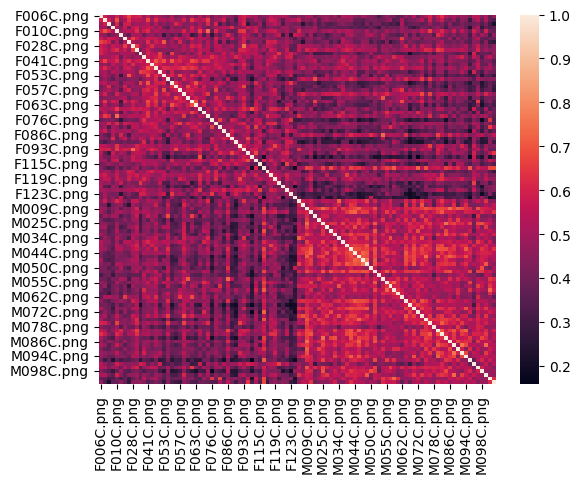

In [ ]:
import seaborn as sns

sns.heatmap(grid1)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid1.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()


(result > 1).sum().sum()

49

In [ ]:
import pandas as pd
result1 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result1

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014600,0.014427,0.011840,0.013007,0.013700,0.013262,0.012691,0.013184,0.012711,0.013771
2,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014990,0.015066,0.013377,0.013476,0.013800,0.013782,0.014158,0.014568,0.013570,0.014378
3,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.014942,0.015080,0.015637,0.014892,0.013077,0.012377,0.013554,0.015165,0.014235,0.013960
4,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.014797,0.014072,0.013397,0.013970,0.013839,0.012749,0.012045,0.013897,0.014026,0.014605
5,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014496,0.016190,0.013541,0.013742,0.013268,0.012748,0.012884,0.015086,0.012534,0.013994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.013262,0.013782,0.012377,0.012749,0.012748,0.013157,0.013362,0.013834,0.013314,0.013949,...,0.013837,0.013466,0.013497,0.012675,0.011855,0.000000,0.013185,0.013834,0.013485,0.011737
97,0.012691,0.014158,0.013554,0.012045,0.012884,0.014483,0.012247,0.012423,0.013354,0.013512,...,0.012852,0.014308,0.013356,0.012951,0.013923,0.013185,0.000000,0.011766,0.013126,0.013889
98,0.013184,0.014568,0.015165,0.013897,0.015086,0.014034,0.013813,0.012674,0.013174,0.012491,...,0.014111,0.013549,0.011795,0.011401,0.013937,0.013834,0.011766,0.000000,0.011306,0.011230
99,0.012711,0.013570,0.014235,0.014026,0.012534,0.014093,0.012991,0.011829,0.012371,0.013097,...,0.013374,0.014680,0.012019,0.013667,0.013258,0.013485,0.013126,0.011306,0.000000,0.012809


In [ ]:
Image_match_df1 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df1



,imageID,Unnamed: 1,FileName
image,1,NaN,F006C
image,2,NaN,F007C
image,3,NaN,F008C
image,4,NaN,F009C
image,5,NaN,F010C
...,...,...,...
image,96,NaN,F120C
image,97,NaN,F121C
image,98,NaN,F122C
image,99,NaN,F123C


In [ ]:
Image_match_df1 = Image_match_df1.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df1

,imageID,FileName
0,1,F006C
1,2,F007C
2,3,F008C
3,4,F009C
4,5,F010C
...,...,...
95,96,F120C
96,97,F121C
97,98,F122C
98,99,F123C


In [ ]:
listOfImagesCleaned1 = [x[:-4] for x in listOfImages]
listOfImagesCleaned1
listOfImagesCleaned1 = np.array(listOfImagesCleaned1)

In [ ]:
np.array_equal(Image_match_df1.FileName.to_numpy(), listOfImagesCleaned1)




False

In [ ]:
cosineSimilarityMatrix1 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid1.csv", index_col= 0)
cosineSimilarityMatrix1
cosineSimilarityMatrix1.columns
np.array_equal(listOfImages, cosineSimilarityMatrix1.columns)

True

In [ ]:
newDictionary1First = dict(zip(Image_match_df1.imageID.astype(str), Image_match_df1.FileName))
newDictionary1Second= dict(zip(Image_match_df1.imageID, Image_match_df1.FileName))

In [ ]:
list(Image_match_df1)
result1 = result1.rename(columns = newDictionary1First, index = newDictionary1Second)
result1

,F006C,F007C,F008C,F009C,F010C,F014C,F016C,F025C,F028C,F030C,...,M100C,M101C,F117C,F118C,F119C,F120C,F121C,F122C,F123C,F124C
F006C,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014600,0.014427,0.011840,0.013007,0.013700,0.013262,0.012691,0.013184,0.012711,0.013771
F007C,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014990,0.015066,0.013377,0.013476,0.013800,0.013782,0.014158,0.014568,0.013570,0.014378
F008C,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.014942,0.015080,0.015637,0.014892,0.013077,0.012377,0.013554,0.015165,0.014235,0.013960
F009C,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.014797,0.014072,0.013397,0.013970,0.013839,0.012749,0.012045,0.013897,0.014026,0.014605
F010C,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014496,0.016190,0.013541,0.013742,0.013268,0.012748,0.012884,0.015086,0.012534,0.013994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F120C,0.013262,0.013782,0.012377,0.012749,0.012748,0.013157,0.013362,0.013834,0.013314,0.013949,...,0.013837,0.013466,0.013497,0.012675,0.011855,0.000000,0.013185,0.013834,0.013485,0.011737
F121C,0.012691,0.014158,0.013554,0.012045,0.012884,0.014483,0.012247,0.012423,0.013354,0.013512,...,0.012852,0.014308,0.013356,0.012951,0.013923,0.013185,0.000000,0.011766,0.013126,0.013889
F122C,0.013184,0.014568,0.015165,0.013897,0.015086,0.014034,0.013813,0.012674,0.013174,0.012491,...,0.014111,0.013549,0.011795,0.011401,0.013937,0.013834,0.011766,0.000000,0.011306,0.011230
F123C,0.012711,0.013570,0.014235,0.014026,0.012534,0.014093,0.012991,0.011829,0.012371,0.013097,...,0.013374,0.014680,0.012019,0.013667,0.013258,0.013485,0.013126,0.011306,0.000000,0.012809


In [ ]:
resultOrdered1 = result1.loc[listOfImagesCleaned1, listOfImagesCleaned1]
resultOrdered1

,F006C,F007C,F008C,F009C,F010C,F014C,F016C,F025C,F028C,F030C,...,M092C,M093C,M094C,M095C,M096C,M097C,M098C,M099C,M100C,M101C
F006C,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014166,0.014234,0.015719,0.014487,0.014410,0.014985,0.015002,0.015419,0.014600,0.014427
F007C,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014636,0.014345,0.015512,0.013728,0.014821,0.013529,0.014896,0.014109,0.014990,0.015066
F008C,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.015835,0.015963,0.015474,0.015283,0.015807,0.014799,0.014366,0.015038,0.014942,0.015080
F009C,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.013532,0.014751,0.015421,0.014238,0.014855,0.015021,0.014847,0.015442,0.014797,0.014072
F010C,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014011,0.014747,0.014888,0.014074,0.014992,0.014789,0.014760,0.014560,0.014496,0.016190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M097C,0.014985,0.013529,0.014799,0.015021,0.014789,0.015380,0.014636,0.014248,0.014202,0.015312,...,0.013159,0.014161,0.015494,0.013342,0.013617,0.000000,0.013194,0.013010,0.013671,0.013709
M098C,0.015002,0.014896,0.014366,0.014847,0.014760,0.015634,0.013504,0.014104,0.014525,0.013772,...,0.012842,0.013281,0.013674,0.012240,0.012941,0.013194,0.000000,0.013216,0.011935,0.013190
M099C,0.015419,0.014109,0.015038,0.015442,0.014560,0.014909,0.015885,0.015620,0.014963,0.015255,...,0.013651,0.013674,0.014359,0.013808,0.015157,0.013010,0.013216,0.000000,0.014729,0.014277
M100C,0.014600,0.014990,0.014942,0.014797,0.014496,0.014503,0.014256,0.013995,0.014467,0.014042,...,0.010957,0.012486,0.012685,0.013272,0.011185,0.013671,0.011935,0.014729,0.000000,0.012431


In [ ]:
from scipy import stats
import numpy as np
triangular1First = resultOrdered1.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular1First.shape

(4950,)

In [ ]:
triangular1Second = cosineSimilarityMatrix1.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular1Second.shape

(4950,)

In [ ]:
from scipy import stats
res1 = stats.spearmanr(triangular1First, triangular1Second)
res1

SignificanceResult(statistic=-0.4133789839602534, pvalue=1.2431559204117985e-203)

In [ ]:
# repeat for everyone, we are done

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
ray1 = np.arange(100)

ray2 = -np.arange(100)
cosine_similarity([ray1], [ray2])


array([[-1.]])

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors2 = []

for i in range(100):
  face_representation = vgg_face_descriptor2.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors2.append(face_representation)



vector2 = np.array(listOfVectors2)
#print(vector)
#vector = vector.flatten()
vector2 = vector2.reshape(100, -1)
#print(vector)


similarity_matrix2 = cosine_similarity(vector2, vector2)


similarity_matrix2

1/1 [==============================] - 1s 655ms/step


array([[0.99999976, 0.46418336, 0.4378009 , ..., 0.35421115, 0.22042125,
        0.27323192],
       [0.46418336, 1.0000001 , 0.41368523, ..., 0.41011214, 0.22754155,
        0.2334668 ],
       [0.4378009 , 0.41368523, 0.99999994, ..., 0.29798788, 0.20165734,
        0.11337053],
       ...,
       [0.35421115, 0.41011214, 0.29798788, ..., 1.0000001 , 0.3515068 ,
        0.28085575],
       [0.22042125, 0.22754155, 0.20165734, ..., 0.3515068 , 0.9999999 ,
        0.43491617],
       [0.27323192, 0.2334668 , 0.11337053, ..., 0.28085575, 0.43491617,
        0.9999999 ]], dtype=float32)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid2.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()


(result > 1).sum().sum()

38

In [ ]:
import pandas as pd
result2 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result2

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014600,0.014427,0.011840,0.013007,0.013700,0.013262,0.012691,0.013184,0.012711,0.013771
2,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014990,0.015066,0.013377,0.013476,0.013800,0.013782,0.014158,0.014568,0.013570,0.014378
3,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.014942,0.015080,0.015637,0.014892,0.013077,0.012377,0.013554,0.015165,0.014235,0.013960
4,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.014797,0.014072,0.013397,0.013970,0.013839,0.012749,0.012045,0.013897,0.014026,0.014605
5,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014496,0.016190,0.013541,0.013742,0.013268,0.012748,0.012884,0.015086,0.012534,0.013994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.013262,0.013782,0.012377,0.012749,0.012748,0.013157,0.013362,0.013834,0.013314,0.013949,...,0.013837,0.013466,0.013497,0.012675,0.011855,0.000000,0.013185,0.013834,0.013485,0.011737
97,0.012691,0.014158,0.013554,0.012045,0.012884,0.014483,0.012247,0.012423,0.013354,0.013512,...,0.012852,0.014308,0.013356,0.012951,0.013923,0.013185,0.000000,0.011766,0.013126,0.013889
98,0.013184,0.014568,0.015165,0.013897,0.015086,0.014034,0.013813,0.012674,0.013174,0.012491,...,0.014111,0.013549,0.011795,0.011401,0.013937,0.013834,0.011766,0.000000,0.011306,0.011230
99,0.012711,0.013570,0.014235,0.014026,0.012534,0.014093,0.012991,0.011829,0.012371,0.013097,...,0.013374,0.014680,0.012019,0.013667,0.013258,0.013485,0.013126,0.011306,0.000000,0.012809


In [ ]:
Image_match_df2 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df2


,imageID,Unnamed: 1,FileName
image,1,NaN,F006C
image,2,NaN,F007C
image,3,NaN,F008C
image,4,NaN,F009C
image,5,NaN,F010C
...,...,...,...
image,96,NaN,F120C
image,97,NaN,F121C
image,98,NaN,F122C
image,99,NaN,F123C


In [ ]:
Image_match_df2 = Image_match_df2.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df2

,imageID,FileName
0,1,F006C
1,2,F007C
2,3,F008C
3,4,F009C
4,5,F010C
...,...,...
95,96,F120C
96,97,F121C
97,98,F122C
98,99,F123C


In [ ]:
listOfImagesCleaned2 = [x[:-4] for x in listOfImages]
listOfImagesCleaned2
listOfImagesCleaned2 = np.array(listOfImagesCleaned2)

In [ ]:
np.array_equal(Image_match_df2.FileName.to_numpy(), listOfImagesCleaned2)

False

In [ ]:
cosineSimilarityMatrix2 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid2.csv", index_col= 0)
cosineSimilarityMatrix2
cosineSimilarityMatrix2.columns
np.array_equal(listOfImages, cosineSimilarityMatrix2.columns)

True

In [ ]:
newDictionary2First = dict(zip(Image_match_df2.imageID.astype(str), Image_match_df2.FileName))
newDictionary2Second = dict(zip(Image_match_df2.imageID, Image_match_df2.FileName))

In [ ]:
list(Image_match_df2)
result2 = result2.rename(columns = newDictionary2First, index = newDictionary2Second)
result2

,F006C,F007C,F008C,F009C,F010C,F014C,F016C,F025C,F028C,F030C,...,M100C,M101C,F117C,F118C,F119C,F120C,F121C,F122C,F123C,F124C
F006C,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014600,0.014427,0.011840,0.013007,0.013700,0.013262,0.012691,0.013184,0.012711,0.013771
F007C,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014990,0.015066,0.013377,0.013476,0.013800,0.013782,0.014158,0.014568,0.013570,0.014378
F008C,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.014942,0.015080,0.015637,0.014892,0.013077,0.012377,0.013554,0.015165,0.014235,0.013960
F009C,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.014797,0.014072,0.013397,0.013970,0.013839,0.012749,0.012045,0.013897,0.014026,0.014605
F010C,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014496,0.016190,0.013541,0.013742,0.013268,0.012748,0.012884,0.015086,0.012534,0.013994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F120C,0.013262,0.013782,0.012377,0.012749,0.012748,0.013157,0.013362,0.013834,0.013314,0.013949,...,0.013837,0.013466,0.013497,0.012675,0.011855,0.000000,0.013185,0.013834,0.013485,0.011737
F121C,0.012691,0.014158,0.013554,0.012045,0.012884,0.014483,0.012247,0.012423,0.013354,0.013512,...,0.012852,0.014308,0.013356,0.012951,0.013923,0.013185,0.000000,0.011766,0.013126,0.013889
F122C,0.013184,0.014568,0.015165,0.013897,0.015086,0.014034,0.013813,0.012674,0.013174,0.012491,...,0.014111,0.013549,0.011795,0.011401,0.013937,0.013834,0.011766,0.000000,0.011306,0.011230
F123C,0.012711,0.013570,0.014235,0.014026,0.012534,0.014093,0.012991,0.011829,0.012371,0.013097,...,0.013374,0.014680,0.012019,0.013667,0.013258,0.013485,0.013126,0.011306,0.000000,0.012809


In [ ]:
resultOrdered2 = result1.loc[listOfImagesCleaned2, listOfImagesCleaned2]
resultOrdered2

,F006C,F007C,F008C,F009C,F010C,F014C,F016C,F025C,F028C,F030C,...,M092C,M093C,M094C,M095C,M096C,M097C,M098C,M099C,M100C,M101C
F006C,0.000000,0.013776,0.013910,0.012447,0.012977,0.011812,0.011360,0.011593,0.011532,0.011980,...,0.014166,0.014234,0.015719,0.014487,0.014410,0.014985,0.015002,0.015419,0.014600,0.014427
F007C,0.013776,0.000000,0.012185,0.013770,0.011516,0.013091,0.012463,0.012316,0.013249,0.012135,...,0.014636,0.014345,0.015512,0.013728,0.014821,0.013529,0.014896,0.014109,0.014990,0.015066
F008C,0.013910,0.012185,0.000000,0.012099,0.012941,0.014446,0.013366,0.014655,0.014911,0.013637,...,0.015835,0.015963,0.015474,0.015283,0.015807,0.014799,0.014366,0.015038,0.014942,0.015080
F009C,0.012447,0.013770,0.012099,0.000000,0.013469,0.012235,0.013446,0.014652,0.012966,0.012393,...,0.013532,0.014751,0.015421,0.014238,0.014855,0.015021,0.014847,0.015442,0.014797,0.014072
F010C,0.012977,0.011516,0.012941,0.013469,0.000000,0.012612,0.012876,0.013049,0.012593,0.010644,...,0.014011,0.014747,0.014888,0.014074,0.014992,0.014789,0.014760,0.014560,0.014496,0.016190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M097C,0.014985,0.013529,0.014799,0.015021,0.014789,0.015380,0.014636,0.014248,0.014202,0.015312,...,0.013159,0.014161,0.015494,0.013342,0.013617,0.000000,0.013194,0.013010,0.013671,0.013709
M098C,0.015002,0.014896,0.014366,0.014847,0.014760,0.015634,0.013504,0.014104,0.014525,0.013772,...,0.012842,0.013281,0.013674,0.012240,0.012941,0.013194,0.000000,0.013216,0.011935,0.013190
M099C,0.015419,0.014109,0.015038,0.015442,0.014560,0.014909,0.015885,0.015620,0.014963,0.015255,...,0.013651,0.013674,0.014359,0.013808,0.015157,0.013010,0.013216,0.000000,0.014729,0.014277
M100C,0.014600,0.014990,0.014942,0.014797,0.014496,0.014503,0.014256,0.013995,0.014467,0.014042,...,0.010957,0.012486,0.012685,0.013272,0.011185,0.013671,0.011935,0.014729,0.000000,0.012431


In [ ]:
from scipy import stats
import numpy as np
triangular2First = resultOrdered2.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular2First.shape

(4950,)

In [ ]:
triangular2Second = cosineSimilarityMatrix2.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular2Second.shape

(4950,)

In [ ]:
from scipy import stats
res2 = stats.spearmanr(triangular2First, triangular2Second)
res2

SignificanceResult(statistic=-0.3308604486718998, pvalue=9.257984573460244e-127)

In [ ]:
import pandas as pd

grid2 = pd.DataFrame(similarity_matrix2, index = listOfImages, columns = listOfImages)
grid2.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid2.csv")

<Axes: >

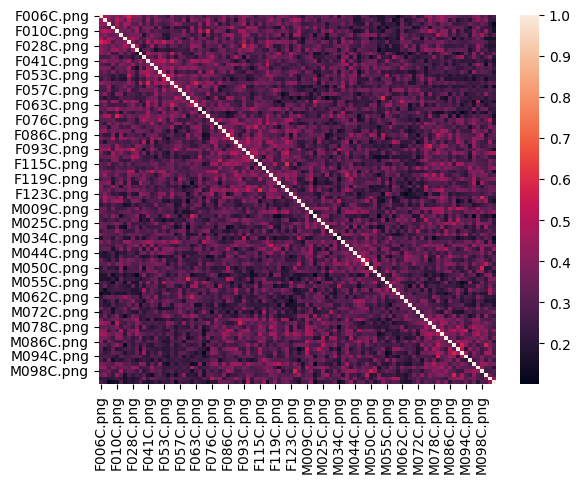

In [ ]:
import seaborn as sns

sns.heatmap(grid2)

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors3 = []

for i in range(100):
  face_representation = vgg_face_descriptor3.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors3.append(face_representation)



vector3 = np.array(listOfVectors3)
vector3 = vector3.reshape(100, -1)



similarity_matrix3 = cosine_similarity(vector3, vector3)


similarity_matrix3

1/1 [==============================] - 1s 678ms/step


array([[1.0000005 , 0.6979878 , 0.7000698 , ..., 0.71208495, 0.6580725 ,
        0.6668066 ],
       [0.6979878 , 1.0000005 , 0.7218086 , ..., 0.62996554, 0.6363395 ,
        0.60503733],
       [0.7000698 , 0.7218086 , 1.        , ..., 0.62833846, 0.60439646,
        0.56615084],
       ...,
       [0.71208495, 0.62996554, 0.62833846, ..., 1.0000006 , 0.6619656 ,
        0.62820333],
       [0.6580725 , 0.6363395 , 0.60439646, ..., 0.6619656 , 0.99999976,
        0.72654444],
       [0.6668066 , 0.60503733, 0.56615084, ..., 0.62820333, 0.72654444,
        0.9999995 ]], dtype=float32)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid3.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()
(result > 1).sum().sum()



result3 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result3


Image_match_df3 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df3


Image_match_df3 = Image_match_df3.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df3


listOfImagesCleaned3 = [x[:-4] for x in listOfImages]
listOfImagesCleaned3
listOfImagesCleaned3 = np.array(listOfImagesCleaned3)


np.array_equal(Image_match_df3.FileName.to_numpy(), listOfImagesCleaned3)


cosineSimilarityMatrix3 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid3.csv", index_col= 0)
cosineSimilarityMatrix3
cosineSimilarityMatrix3.columns
np.array_equal(listOfImages, cosineSimilarityMatrix3.columns)


newDictionary3First = dict(zip(Image_match_df3.imageID.astype(str), Image_match_df3.FileName))
newDictionary3Second = dict(zip(Image_match_df3.imageID, Image_match_df3.FileName))


list(Image_match_df3)
result3 = result3.rename(columns = newDictionary3First, index = newDictionary3Second)
result3


resultOrdered3 = result3.loc[listOfImagesCleaned3, listOfImagesCleaned3]
resultOrdered3


from scipy import stats
import numpy as np
triangular3First = resultOrdered3.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular3First.shape


triangular3Second = cosineSimilarityMatrix3.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular3Second.shape


from scipy import stats
res3 = stats.spearmanr(triangular3First, triangular3Second)
res3



SignificanceResult(statistic=-0.3674789612861461, pvalue=4.1313925881172256e-158)

In [ ]:
import pandas as pd

grid3 = pd.DataFrame(similarity_matrix3, index = listOfImages, columns = listOfImages)
grid3.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid3.csv")

<Axes: >

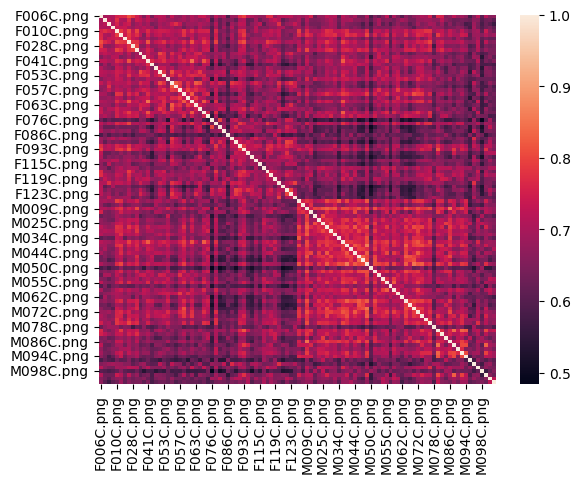

In [ ]:
import seaborn as sns

sns.heatmap(grid3)

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors4 = []

for i in range(100):
  face_representation = vgg_face_descriptor4.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors4.append(face_representation)



vector4 = np.array(listOfVectors4)
vector4 = vector4.reshape(100, -1)



similarity_matrix4 = cosine_similarity(vector4, vector4)


similarity_matrix4

1/1 [==============================] - 0s 394ms/step


array([[1.0000029 , 0.64441156, 0.6097126 , ..., 0.6612924 , 0.6422823 ,
        0.6501643 ],
       [0.64441156, 1.0000056 , 0.68587816, ..., 0.57383376, 0.6062546 ,
        0.62957406],
       [0.6097126 , 0.68587816, 1.0000048 , ..., 0.5616077 , 0.5890627 ,
        0.6005297 ],
       ...,
       [0.6612924 , 0.57383376, 0.5616077 , ..., 1.0000031 , 0.5716244 ,
        0.5825106 ],
       [0.6422823 , 0.6062546 , 0.5890627 , ..., 0.5716244 , 1.0000029 ,
        0.6957516 ],
       [0.6501643 , 0.62957406, 0.6005297 , ..., 0.5825106 , 0.6957516 ,
        1.000005  ]], dtype=float32)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid4.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()
(result > 1).sum().sum()



result4 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result4


Image_match_df4 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df4


Image_match_df4 = Image_match_df4.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df4


listOfImagesCleaned4 = [x[:-4] for x in listOfImages]
listOfImagesCleaned4
listOfImagesCleaned4 = np.array(listOfImagesCleaned4)


np.array_equal(Image_match_df4.FileName.to_numpy(), listOfImagesCleaned4)


cosineSimilarityMatrix4 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid4.csv", index_col= 0)
cosineSimilarityMatrix4
cosineSimilarityMatrix4.columns
np.array_equal(listOfImages, cosineSimilarityMatrix4.columns)


newDictionary4First = dict(zip(Image_match_df4.imageID.astype(str), Image_match_df4.FileName))
newDictionary4Second = dict(zip(Image_match_df4.imageID, Image_match_df4.FileName))


list(Image_match_df4)
result4 = result4.rename(columns = newDictionary4First, index = newDictionary4Second)
result4


resultOrdered4 = result4.loc[listOfImagesCleaned4, listOfImagesCleaned4]
resultOrdered4


from scipy import stats
import numpy as np
triangular4First = resultOrdered4.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular4First.shape


triangular4Second = cosineSimilarityMatrix4.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular4Second.shape


from scipy import stats
res4 = stats.spearmanr(triangular4First, triangular4Second)
res4

SignificanceResult(statistic=-0.26463584348431196, pvalue=4.1743744428606574e-80)

In [ ]:
import pandas as pd

grid4 = pd.DataFrame(similarity_matrix4, index = listOfImages, columns = listOfImages)
grid4.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid4.csv")

<Axes: >

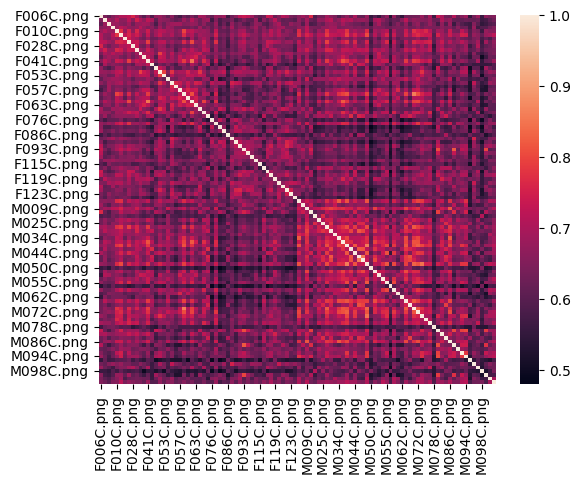

In [ ]:
import seaborn as sns

sns.heatmap(grid4)

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors5 = []

for i in range(100):
  face_representation = vgg_face_descriptor5.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors5.append(face_representation)



vector5 = np.array(listOfVectors5)
vector5 = vector5.reshape(100, -1)



similarity_matrix5 = cosine_similarity(vector5, vector5)


similarity_matrix5

1/1 [==============================] - 0s 306ms/step


array([[1.0000323 , 0.7989265 , 0.7744128 , ..., 0.77494377, 0.78512466,
        0.80410993],
       [0.7989265 , 1.0000304 , 0.8165234 , ..., 0.7247275 , 0.76018304,
        0.79189754],
       [0.7744128 , 0.8165234 , 1.0000323 , ..., 0.731032  , 0.77426153,
        0.77925944],
       ...,
       [0.77494377, 0.7247275 , 0.731032  , ..., 1.0000311 , 0.7008058 ,
        0.7350315 ],
       [0.78512466, 0.76018304, 0.77426153, ..., 0.7008058 , 1.0000235 ,
        0.81177515],
       [0.80410993, 0.79189754, 0.77925944, ..., 0.7350315 , 0.81177515,
        1.0000235 ]], dtype=float32)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid5.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()
(result > 1).sum().sum()



result5 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result5


Image_match_df5 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df5


Image_match_df5 = Image_match_df5.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df5


listOfImagesCleaned5 = [x[:-4] for x in listOfImages]
listOfImagesCleaned5
listOfImagesCleaned5 = np.array(listOfImagesCleaned5)


np.array_equal(Image_match_df5.FileName.to_numpy(), listOfImagesCleaned5)


cosineSimilarityMatrix5 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid5.csv", index_col= 0)
cosineSimilarityMatrix5
cosineSimilarityMatrix5.columns
np.array_equal(listOfImages, cosineSimilarityMatrix5.columns)


newDictionary5First = dict(zip(Image_match_df5.imageID.astype(str), Image_match_df5.FileName))
newDictionary5Second = dict(zip(Image_match_df5.imageID, Image_match_df5.FileName))


list(Image_match_df5)
result5 = result5.rename(columns = newDictionary5First, index = newDictionary5Second)
result5


resultOrdered5 = result5.loc[listOfImagesCleaned5, listOfImagesCleaned5]
resultOrdered5


from scipy import stats
import numpy as np
triangular5First = resultOrdered5.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular5First.shape


triangular5Second = cosineSimilarityMatrix5.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular5Second.shape


from scipy import stats
res5 = stats.spearmanr(triangular5First, triangular5Second)
res5

SignificanceResult(statistic=-0.237924210307564, pvalue=1.1624393095950095e-64)

In [ ]:
import pandas as pd

grid5 = pd.DataFrame(similarity_matrix5, index = listOfImages, columns = listOfImages)
grid5.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid5.csv")

<Axes: >

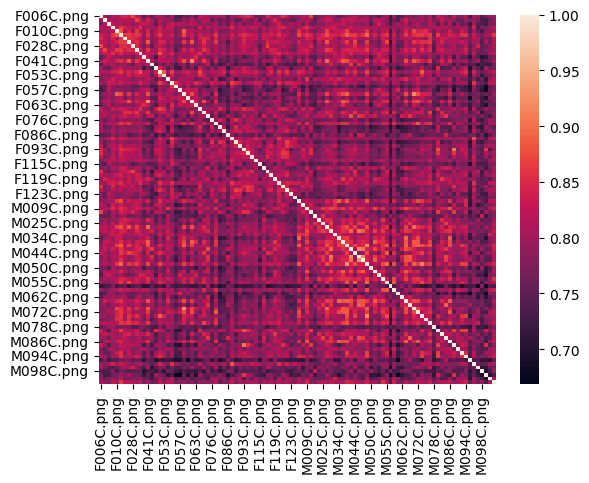

In [ ]:
import seaborn as sns

sns.heatmap(grid5)

In [ ]:
# we are going to try to calculate spatial cosine distance

from sklearn.metrics.pairwise import cosine_similarity

listOfVectors6 = []

for i in range(100):
  face_representation = vgg_face_descriptor6.predict(preprocess_image(path + listOfImages[i]))[0,:]
  listOfVectors6.append(face_representation)



vector6 = np.array(listOfVectors6)
#print(vector)
#vector = vector.flatten()
vector6 = vector6.reshape(100, -1)
#print(vector)


similarity_matrix6 = cosine_similarity(vector6, vector6)


similarity_matrix6

1/1 [==============================] - 0s 150ms/step


array([[1.0002062 , 0.95035464, 0.93923306, ..., 0.94350207, 0.93617177,
        0.953712  ],
       [0.95035464, 1.0002233 , 0.9467622 , ..., 0.9336198 , 0.9306248 ,
        0.9421931 ],
       [0.93923306, 0.9467622 , 1.0002418 , ..., 0.92504907, 0.9354024 ,
        0.9355302 ],
       ...,
       [0.94350207, 0.9336198 , 0.92504907, ..., 1.0001711 , 0.9244879 ,
        0.93607396],
       [0.93617177, 0.9306248 , 0.9354024 , ..., 0.9244879 , 1.0001595 ,
        0.9432577 ],
       [0.953712  , 0.9421931 , 0.9355302 , ..., 0.93607396, 0.9432577 ,
        1.0002204 ]], dtype=float32)

In [ ]:
import pandas as pd
result = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid6.csv", index_col= 0)
result
#(result > 0).sum().sum()
((1 - result) > 0).sum().sum()
(result > 1).sum().sum()



result6 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/rsatoolboxRDM_m.csv", index_col = 0)
result6


Image_match_df6 = pd.read_csv("/content/gdrive/My Drive/Jayden Research in Adolphs Lab/data/imageOrder_MTurk.txt", sep = " ")
Image_match_df6


Image_match_df6 = Image_match_df6.reset_index(drop = True).drop(['Unnamed: 1'], axis = 1)
Image_match_df6


listOfImagesCleaned6 = [x[:-4] for x in listOfImages]
listOfImagesCleaned6
listOfImagesCleaned6 = np.array(listOfImagesCleaned6)


np.array_equal(Image_match_df6.FileName.to_numpy(), listOfImagesCleaned6)


cosineSimilarityMatrix6 = pd.read_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid6.csv", index_col= 0)
cosineSimilarityMatrix6
cosineSimilarityMatrix6.columns
np.array_equal(listOfImages, cosineSimilarityMatrix6.columns)


newDictionary6First = dict(zip(Image_match_df6.imageID.astype(str), Image_match_df6.FileName))
newDictionary6Second = dict(zip(Image_match_df6.imageID, Image_match_df6.FileName))


list(Image_match_df6)
result6 = result6.rename(columns = newDictionary6First, index = newDictionary6Second)
result6


resultOrdered6 = result6.loc[listOfImagesCleaned6, listOfImagesCleaned6]
resultOrdered6


from scipy import stats
import numpy as np
triangular6First = resultOrdered6.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular6First.shape


triangular6Second = cosineSimilarityMatrix6.to_numpy()[np.tril_indices(n = 100, k=-1, m=None)]
triangular6Second.shape


from scipy import stats
res6 = stats.spearmanr(triangular6First, triangular6Second)
res6

SignificanceResult(statistic=-0.23093055667263426, pvalue=6.401385393539967e-61)

In [ ]:
import pandas as pd

grid6 = pd.DataFrame(similarity_matrix6, index = listOfImages, columns = listOfImages)
grid6.to_csv("/content/gdrive/My Drive/CosineSimilarityMatrix/finalGrid6.csv")

<Axes: >

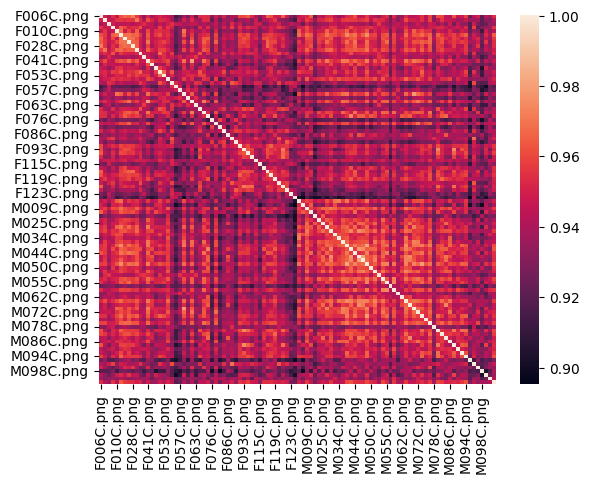

In [ ]:
import seaborn as sns

sns.heatmap(grid6)